In [3]:
# Setup autoreload
%load_ext autoreload
%autoreload 2

# Give yourself access to common and parent modules
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


c:\Users\mmart\Programming\EECS545\project\EECS-545---Predicting-NBA-Player-s-Salary\common.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba['inflationAdjSalary_log'] = nba['inflationAdjSalary'].apply(lambda x: np.log(x))
C:\Users\mmart\AppData\Local\Temp\ipykernel_56052\2089849496.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())
C:\Users\mmart\AppData\Local\Temp\ipykernel_56052\2089849496.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid 

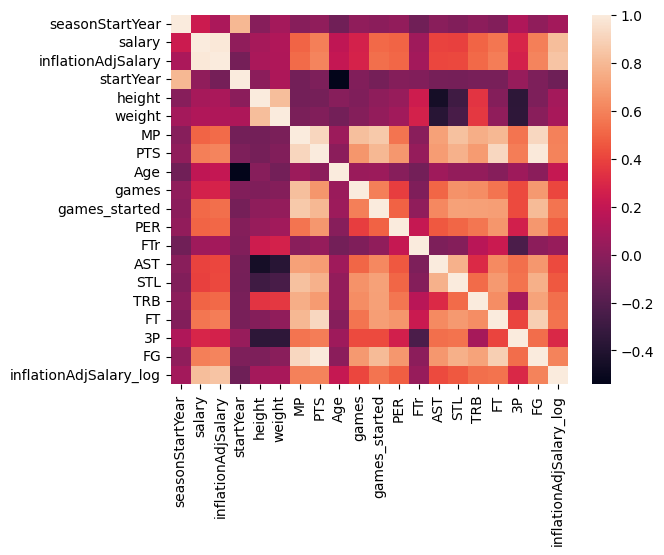

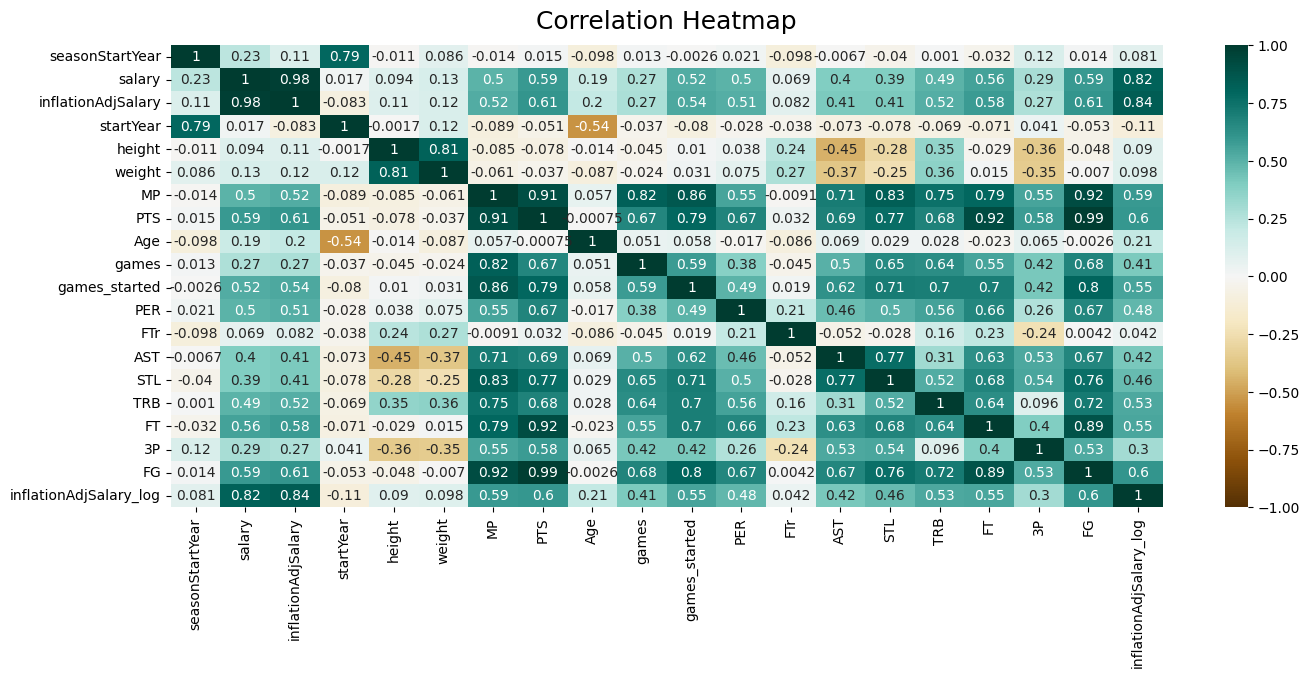

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from common import get_baseline_data

data = get_baseline_data('../data/cleaned_data/base_cleaned.csv')
# data = data[['inflationAdjSalary_log','MP', 'PTS', 'Age', 'games_started', 'PER', 'AST', 'STL', 'TRB', '3P']]
sns.heatmap(data.corr())

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('./graphs/heatmap.png', dpi=300, bbox_inches='tight')
plt.show()